Name: A Rahul  
Reg. No.: 20BRS1102 **bold text**

Exercise 1: VGG16 Model execution on cifar dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test)= keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.15, 
                                                  stratify=np.array(y_train), 
                                                  random_state=42)

In [ ]:
BATCH_SIZE = 32
EPOCHS = 40
NUM_CLASSES = 10
LEARNING_RATE = 1e-4
MOMENTUM = 0.9
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
Y_val = np_utils.to_categorical(y_val, NUM_CLASSES)
Y_test = np_utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(48, 48, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Extract the last layer from third block of vgg16 model
last = base_model.get_layer('block3_pool').output
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
#from keras.engine import Model
# Add classification layers on top of it
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)
pred = Dense(NUM_CLASSES, activation='softmax')(x)
model = keras.Model(base_model.input, pred)

In [ ]:
for layer in base_model.layers:
     layer.trainable = False

In [ ]:
from keras.optimizers import Adam

model.compile(loss='binary_crossentropy',optimizer=Adam(lr=LEARNING_RATE),metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=False)

In [ ]:
train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train,Y_train, batch_size=BATCH_SIZE)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1. / 255,horizontal_flip=False)

val_datagen.fit(X_val)
val_generator = val_datagen.flow(X_val,Y_val,batch_size=BATCH_SIZE)

In [ ]:
train_steps_per_epoch = X_train.shape[0] // BATCH_SIZE
val_steps_per_epoch = X_val.shape[0] // BATCH_SIZE

history = model.fit_generator(train_generator,steps_per_epoch=train_steps_per_epoch, validation_data=val_generator,validation_steps=val_steps_per_epoch,epochs=EPOCHS, verbose=1)

Epoch 1/40


<ipython-input-17-38ab0eb7bcd0>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


1328/1328 [==============================] - 19s 8ms/step - loss: 0.2872 - accuracy: 0.3700 - val_loss: 0.2011 - val_accuracy: 0.5788
Epoch 2/40
1328/1328 [==============================] - 10s 8ms/step - loss: 0.2155 - accuracy: 0.5395 - val_loss: 0.1767 - val_accuracy: 0.6282
Epoch 3/40
1328/1328 [==============================] - 9s 7ms/step - loss: 0.1934 - accuracy: 0.5931 - val_loss: 0.1637 - val_accuracy: 0.6544
Epoch 4/40
1328/1328 [==============================] - 10s 8ms/step - loss: 0.1794 - accuracy: 0.6253 - val_loss: 0.1557 - val_accuracy: 0.6692
Epoch 5/40
1328/1328 [==============================] - 10s 7ms/step - loss: 0.1705 - accuracy: 0.6445 - val_loss: 0.1493 - val_accuracy: 0.6834
Epoch 6/40
1328/1328 [==============================] - 10s 7ms/step - loss: 0.1635 - accuracy: 0.6619 - val_loss: 0.1445 - val_accuracy: 0.6972
Epoch 7/40
1328/1328 [==============================] - 9s 7ms/step - loss: 0.1583 - accuracy: 0.6716 - val_loss: 0.1411 - val_accuracy: 0.701

Exercise 2: Visualizing kernel filters

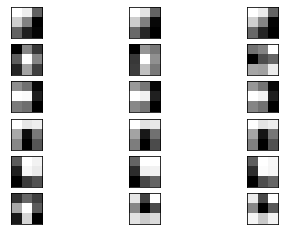

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16()
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
 # get the filter
 f = filters[:, :, :, i]
 # plot each channel separately
 for j in range(3):
 # specify subplot and turn of axi
   ax = plt.subplot(n_filters, 3, ix)
   ax.set_xticks([])
   ax.set_yticks([])
 # plot filter channel in grayscale
   plt.imshow(f[:, :, j], cmap='gray')
   ix += 1
# show the figure
plt.show()

Exercise 3 :Visualizing feature maps

1/1 [==============================] - 8s 8s/step


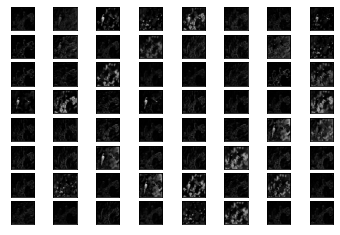

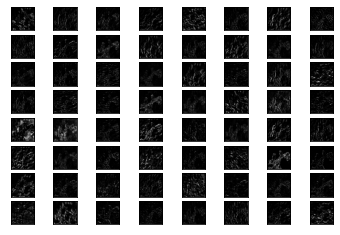

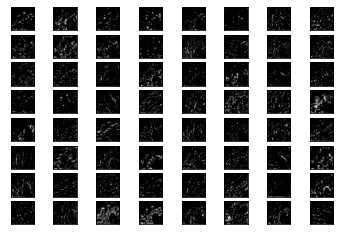

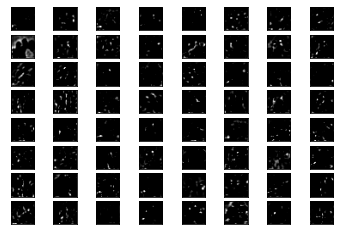

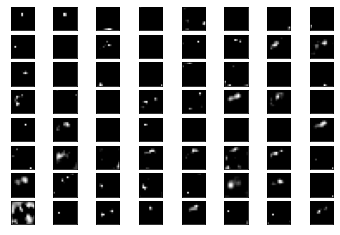

In [ ]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img,img_to_array

from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('/content/bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()